# Universidad Nacional de Colombia sede Medellín
# Optimización heurística
### Davinson Montoya Ramirez 71277483
### Jessica María Rivera Jiménez 1017205993
### Luis Felipe Arévalo Cortés 1018469500



**2. Problema del vendedor viajero**

En este problema se utilizarán modelos metaheurísticos para resolver el problema del vendedor viajero. Se tienen diferentes ciudades en colombia, en las cuales el objetivo es visitar cada una de estas con el menor costo posible. 

Se utiliza el modelo genético docplex para calcular las distancias entre ciudades (arcos).

In [ ]:
pip install docplex

     |████████████████████████████████| 635 kB 5.1 MB/s 
  Created wheel for docplex: filename=docplex-2.21.207-py3-none-any.whl size=700543 sha256=277e0ac81444d4b685f28fa44caf5cdbd451a124baf1e0a3ba35d979eabaa5b1
  Stored in directory: /root/.cache/pip/wheels/d8/4e/62/e43a45757e70549e6aa4712ccfcf67440a203c278ecb68de49
Successfully built docplex


In [ ]:
#Comenzaremos importanto las librerias necesarias.
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model
import docplex.mp.solution as Solucion

### <font color=blue> Creanción de los datos del Modelo </font>

En el siguiente paso se definen los arcos: (Distancia entre un punto a los demás). El problema es lineal.

In [ ]:
#Estamos trabajando con datos ficticios, por lo cual se creará un set de ciudades y arcos.
# Los ciclos for están dentro de [ ], para crear listas con esa cantidad de datos.
n=15
ciudades=[i for i in range(n)] # Creamos ciudades de la 0 a la 9  
arcos =[(i,j) for i in ciudades for j in ciudades if i!=j]

Se observa la información que comprenden los arcos.

In [ ]:
arcos

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (

Las coordenadas de las ciudades se sacaron a partir de la API de google maps.

In [ ]:
coord_x=[3.5725314,1.5262483,4.0538969,4.6482837,4.5697079,4.3983317,5.4980145,9.9702378,8.6656766,10.914889,10.4268577,8.6044567,6.2441988,7.1192047,8.0287423]
coord_y=[-76.3383559,-79.0436078,-76.1843476,-74.2478938,-75.9314002,-75.9198762,-75.8344085,-74.0464178,-76.0029754,-74.8369296,-75.5920573,-77.4442709,-75.6691578,-73.166248,-72.6029817]
name=['Palmira','Pasto','Tuluá','Bogota','Pereira','Armenia','Caldas','Valledupar','Montería','Soledad','Cartagena','Barranquilla','Medellín','Bucaramanga','Cúcuta']

Se realiza la gráfica de las coordenadas de cada ciudad

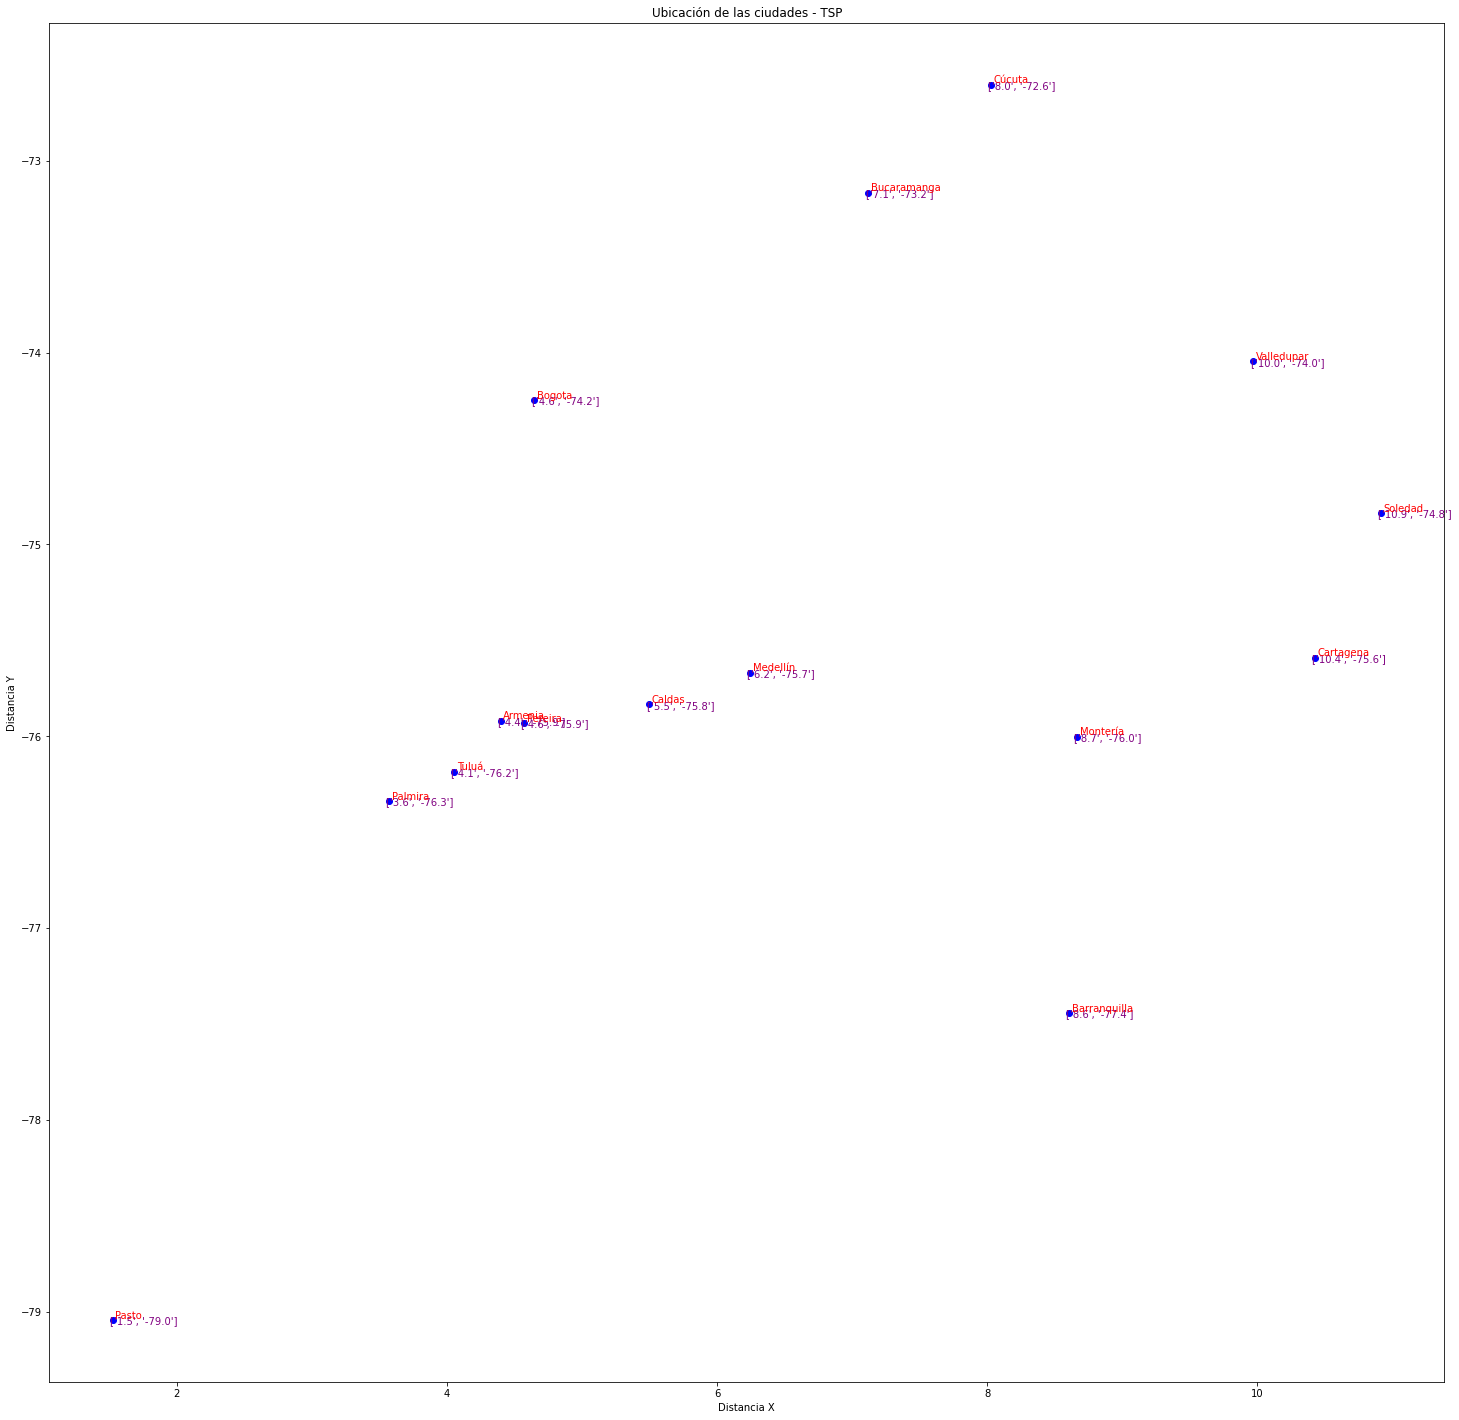

In [ ]:
x=coord_x
y=coord_y

plt.figure(figsize=(25,25))
plt.scatter(x,y,color='blue')
s=[]
for n in range(len(coord_x)):
    s_temp=[]
    s_temp.append("%.1f" %coord_x[n])
    s_temp.append("%.1f" %coord_y[n])
    s.append(s_temp)

plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Ubicación de las ciudades")

for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]-0.02,coord_y[n]-0.02), 
                 color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(name[n]), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.02,coord_y[n]+0.01),
                 color='red')

plt.show()

Se realiza la multiplicación de cada arco por cada coordenada para ingresarlo al modelo.

In [ ]:
#Ahora debemos crear un link entre las las ciudades, sus coordenadas y la distancia entre ellas.

#Los parentesis de llave significan que es un diccionario { }.De esta manera creamos un link
# entre los arcos y la distancia.

distancia={(i, j): np.hypot(coord_x[i] - coord_x[j], coord_y[i] - coord_y[j]) for i,j in arcos}

### <font color=blue> Creando el modelo a resolver </font>

Se utiliza el modelo genético llamado TSP para calcular la distancia mínima entre las coordenadas

In [ ]:
# Creando el modelo en Cplex
mdl=Model('TSP')

In [ ]:
#Declaramos las variables a utilizar
#los nombre y forma de llamar las variables es propia de CPLEX.

x=mdl.binary_var_dict(arcos,name='x')
d=mdl.continuous_var_dict(ciudades,name='d')

#### <font color=green> Función objetivo del TPS </font>
\begin{equation}
Min\;Z=\displaystyle\sum_{\forall \;A} x_{ij}c_{ij}
\end{equation}

Definición de la función objetivo del modelo

In [ ]:
mdl.minimize(mdl.sum(distancia[i]*x[i] for i in arcos))

#### <font color=green> Restricciones del TPS </font>
\begin{equation}
\displaystyle\sum_{\forall \;i \; \in \; Ciudades} x_i=1
\end{equation}
\begin{equation}
\displaystyle\sum_{\forall \;j \; \in \; Ciudades} x_j=1
\end{equation}
\begin{equation}
c_i+1\geq c_j+M(1-x_{ij})
\end{equation}

Se definen las restricciones para el problema de minimización. Debe sumar todos los puntos i y j

In [ ]:
# Primero restricción sumatoria para todo i
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if i==c)==1, 
                       ctname='out_%d'%c)

In [ ]:
# Segundo restricción sumatoria para todo j
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if j==c)==1, 
                       ctname='in_%d'%c)

In [ ]:
#print(mdl.export_to_string())

In [ ]:
# Por último restricción lógica
for i,j in arcos:
    if j!=0:
        mdl.add_indicator(x[(i,j)],d[i]+1==d[j], 
                          name='order_(%d,_%d)'%(i, j))

Aplicación del modelo genético TSP al problema de minimizar la distancia entre ciudades.

In [ ]:
mdl.parameters.timelimit=120
mdl.parameters.mip.strategy.branch=1
mdl.parameters.mip.tolerances.mipgap=0.15

solucion = mdl.solve(log_output=True)

Version identifier: 20.1.0.0 | 2020-11-11 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Strategy_Branch                     1
CPXPARAM_TimeLimit                               120
CPXPARAM_MIP_Tolerances_MIPGap                   0.14999999999999999
Tried aggregator 2 times.
MIP Presolve modified 91 coefficients.
Aggregator did 91 substitutions.
Reduced MIP has 135 rows, 330 columns, and 735 nonzeros.
Reduced MIP has 210 binaries, 0 generals, 0 SOSs, and 196 indicators.
Presolve time = 0.01 sec. (0.64 ticks)
Probing time = 0.00 sec. (0.34 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 135 rows, 330 columns, and 735 nonzeros.
Reduced MIP has 210 binaries, 0 generals, 0 SOSs, and 196 indicators.
Presolve time = 0.01 sec. (0.49 ticks)
Probing time = 0.01 sec. (0.34 ticks)
Clique table members: 121.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 2 threads.
Ro

In [ ]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [ ]:
solucion.display()

solution for: TSP
objective: 26.695
x_0_1 = 1
x_1_2 = 1
x_2_4 = 1
x_3_0 = 1
x_4_5 = 1
x_5_6 = 1
x_6_12 = 1
x_7_14 = 1
x_8_10 = 1
x_9_7 = 1
x_10_9 = 1
x_11_8 = 1
x_12_11 = 1
x_13_3 = 1
x_14_13 = 1
d_1 = 1.000
d_2 = 2.000
d_3 = 14.000
d_4 = 3.000
d_5 = 4.000
d_6 = 5.000
d_7 = 11.000
d_8 = 8.000
d_9 = 10.000
d_10 = 9.000
d_11 = 7.000
d_12 = 6.000
d_13 = 13.000
d_14 = 12.000


Con lo anterior se observa la distancia euclidiana entre los puntos.

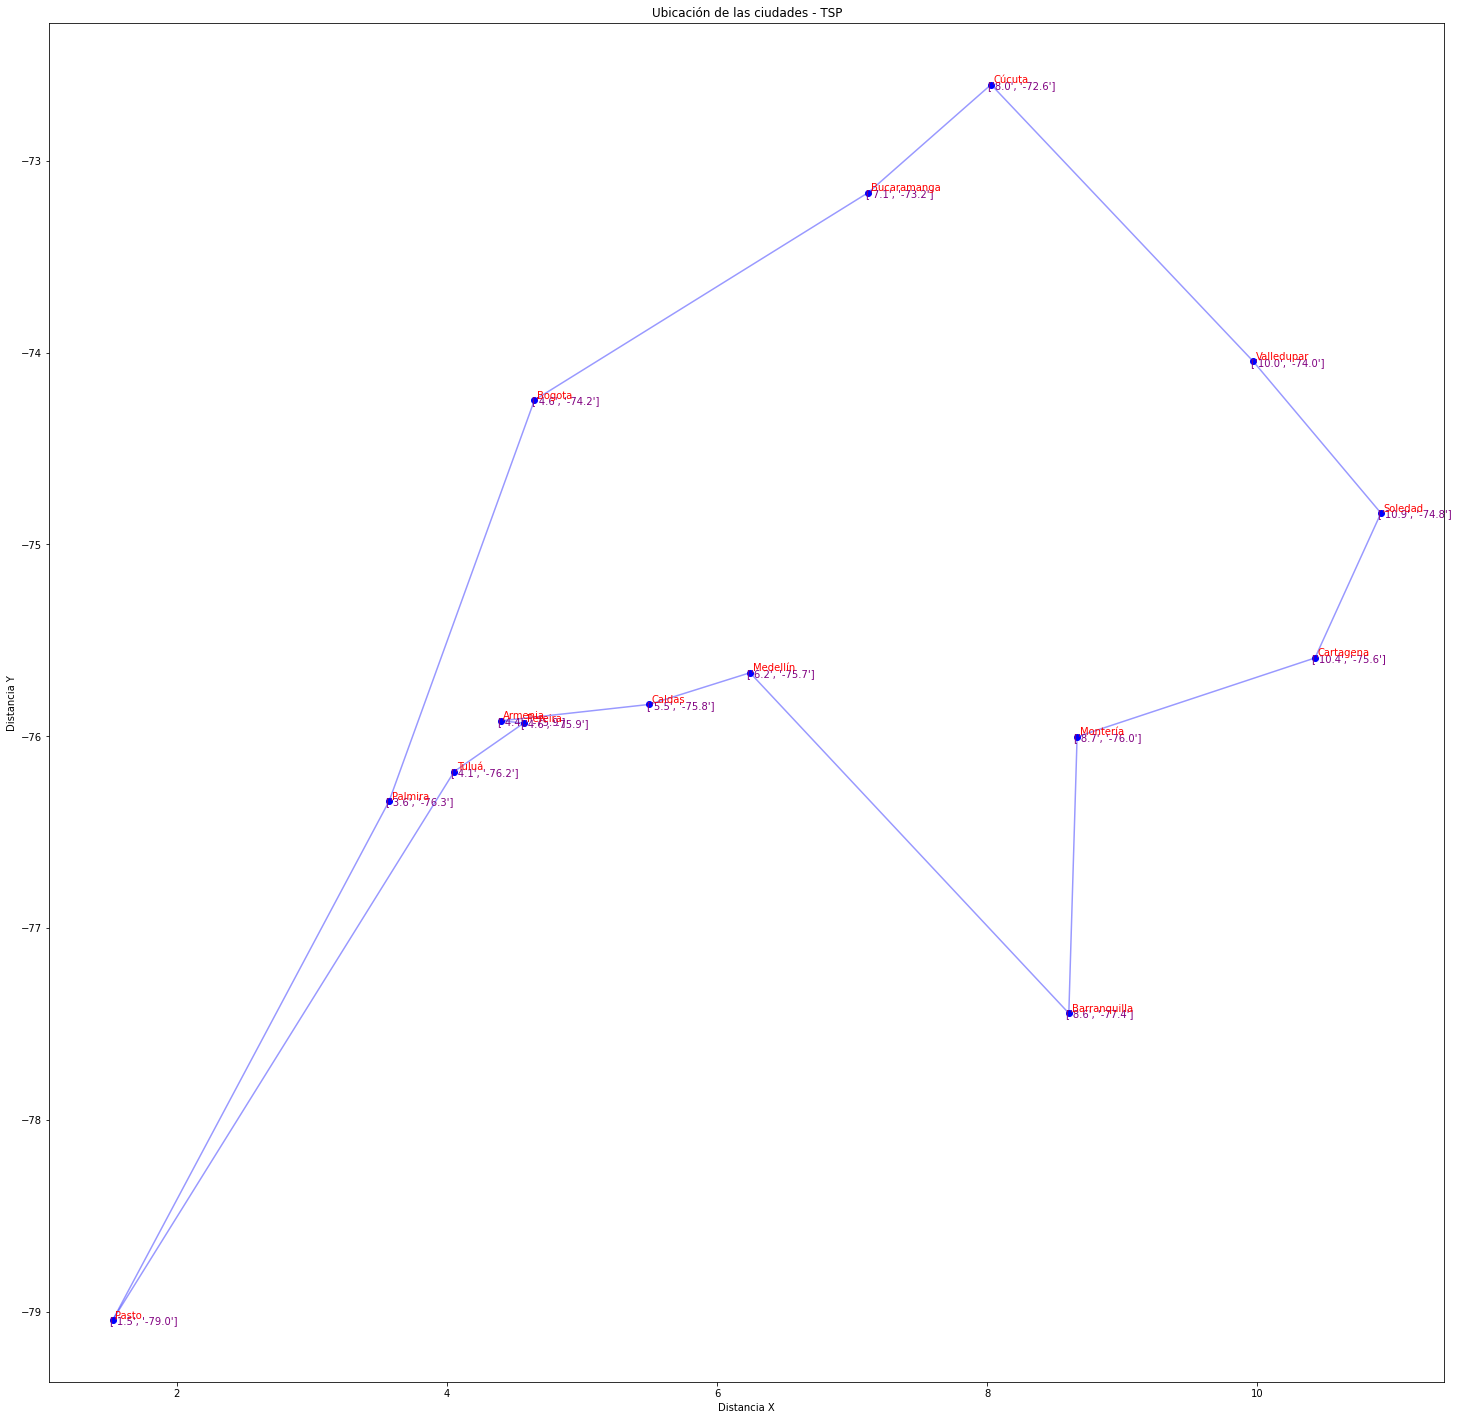

In [ ]:
#Imprimiento la solución óptima.

plt.figure(figsize=(25,25))
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Ubicación de las ciudades")


arcos_activos = [i for i in arcos if x[i].solution_value > 0.9]
for i,j in arcos_activos:
    plt.plot([coord_x[i],coord_x[j]],[coord_y[i],coord_y[j]],
              color='b', alpha=0.4, zorder=0)
plt.scatter(x=coord_x, y=coord_y, color='blue', zorder=1)
    
for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), 
                 xytext=(coord_x[n]-0.02,coord_y[n]-0.02), color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(name[n]), xy=(coord_x[n],coord_y[n] ), 
                 xytext=(coord_x[n]+0.02,coord_y[n]+0.01),color='red')
    

plt.show()

Lo anterior muestra la ruta con menor distancia del algoritmo genético TSO

Inicia en el siguieiente orden: Palmira, Pasto, Tulua, Pereira, Armenia, Caldas, Medellín, Barranquilla, Montería, Cartagena, Soledad, Valledupar, Cúcuta, Bucaramanga, Bogotá y Finaliza en Palmira.

El anterior modelo fue tomado a partir de:


*   https://developers.google.com/optimization/routing/tsp




______________________________________________________________________________

Algoritmo Genético de google

In [ ]:
pip install ortools

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\RaveSeguros\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Se crea la matriz de distancias con la siguiente API:

*   https://developers.google.com/optimization/routing/vrp#distance_matrix_api




In [ ]:
distancematrix = [
        [0, 401, 79, 438, 194, 165, 384, 1105, 997, 1238, 1279, 1242, 408, 749, 942],
        [401, 0, 469, 829, 586, 556, 775, 1496, 1198, 1629, 1424, 1633, 799, 1140, 1333],
        [79, 467, 0, 361, 117, 88, 307, 1028, 920, 1161, 1202, 1165, 331, 672, 865],
        [448, 831, 370, 0, 321, 283, 434, 866, 789, 1000, 1040, 1004, 418, 398, 557],
        [196, 584, 117, 312, 0, 45, 217, 913, 640, 1044, 866, 1049, 241, 557, 749],
        [165, 554, 87.2, 273, 44.8, 0, 236, 940, 659, 1071, 885, 1077, 260, 584, 777],
        [401, 790, 323, 431, 228, 282, 0, 769, 425, 714, 652, 727, 23,8, 413, 605],
        [1103, 1492, 1025, 864, 911, 950, 768, 0, 433, 296, 362, 302, 747, 448, 539],
        [806, 1194, 727, 793, 626, 670, 425, 436, 0, 341, 249, 354, 404, 617, 707],
        [1094, 1483, 1016, 994, 1042, 1081, 714, 295, 339, 0, 128, 15.2, 693, 579, 669],
        [1031, 1419, 952, 1037, 851, 895, 650, 361, 244, 128, 0, 119, 629, 622, 712],
        [1240, 1495, 1161, 1000, 1048, 1086, 743, 301, 367, 15,2, 119, 0, 723, 585, 675],
        [404, 793, 325, 415, 224, 268, 23.3, 748, 404, 693, 631, 706, 0, 392, 584],
        [749, 1138, 671, 397, 558, 596, 414, 449, 614, 581, 624, 586, 393, 0, 197],
        [939, 1328, 861, 555, 748, 786, 604, 539, 704, 671, 713, 676, 583, 195, 0],
    ]  # yapf: disable

Se definió un carro Mini Cooper y gasolina corriente. El precio del galón se definió en $8.525

In [ ]:
precioscomb = 10*8525

precioscomb se define el costo del combustible por kilómetro que consumirá el vehículo

Se crea una lista para crear una matriz de costo en cada recorrido

In [ ]:
costaCom = []
for i in distancematrix:
    my_new_list = []
    for j in i:
        my_new_list.append(j * precioscomb)
    costaCom.append(my_new_list)

La matriz de peajes, que se define como el número de peajes que existen entre cada reccorido es la siguiente:

In [ ]:
peajesmatrix = [
        [0, 4, 3, 10, 5, 5, 7, 14, 16, 0, 19, 18, 9, 12, 14],
        [4, 0, 4, 13, 8, 8, 10, 17, 19, 21, 21, 21, 12, 15, 17],
        [3, 4, 0, 10, 5, 5, 7, 14, 16, 18, 19, 18, 9, 12, 14],
        [10, 13, 10, 0, 6, 5, 4, 9, 11, 13, 12, 13, 6, 6, 5],
        [5, 8, 5, 6, 0, 1, 2, 9, 11, 13, 14, 13, 4, 7, 9],
        [5, 8, 5, 5, 1, 0, 3, 9, 12, 13, 15, 13, 5, 7, 9],
        [7, 10, 7, 4, 2, 3, 0, 7, 10, 11, 13, 11, 3, 5, 7],
        [14, 17, 14, 9, 9, 9, 7, 0, 10, 5, 4, 5, 9, 5, 3],
        [16, 19, 16, 11, 11, 12, 10, 10, 0, 6, 5, 6, 8, 10, 8],
        [0, 21, 18, 13, 13, 13, 11, 5, 6, 0, 3, 0, 12, 9, 7],
        [19, 21, 19, 12, 14, 15, 13, 4, 5, 3, 0, 3, 10, 8, 6],
        [18, 21, 18, 13, 13, 13, 11, 5, 6, 0, 3, 0, 12, 9, 7],
        [9, 12, 9, 6, 4, 5, 3, 9, 8, 12, 10, 12, 0, 7, 9],
        [12, 15, 12, 6, 7, 7, 5, 5, 10, 9, 8, 9, 7, 0, 2],
        [14, 17, 114, 5, 9, 9, 7, 3, 8, 7, 6, 7, 9, 2, 0],
    ] 

Se definió cada costo de peaje en $11.000 que sale como el promedio de precios que hay normalmente en el país.

In [ ]:
preciospeaj = 11000

Se multiplica cada uno de los pejaes por el costo que tiene cada uno, esto se almacena en una nueva matriz

In [ ]:
costaPea = []
for i in peajesmatrix:
    my_new_list = []
    for j in i:
        my_new_list.append(j * precioscomb)
    costaPea.append(my_new_list)

Se suman dos matrices: Costo del trayecto por combustible y el costo de peajes

In [ ]:
distanceMatrixCosto = []
for i in range(0, len(costaPea)):
    lists = []
    for j in range(0, len(costaPea[i])):
        lists.append(costaPea[i][j] + costaCom[i][j])
    distanceMatrixCosto.append(lists)

Se aplica el algoritmo genético para resolver el problema. Se envía la matriz de costos y se optimiza

In [ ]:
"""Simple travelling salesman problem between cities."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    

    data['distance_matrix'] = distanceMatrixCosto
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: COP {} '.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(name[manager.IndexToNode(index)])
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(name[manager.IndexToNode(index)])
    print(plan_output)
    plan_output += 'Route distance: {}COP\n'.format(route_distance)


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == '__main__':
    main()

Objective: COP 326865550 
Route for vehicle 0:
 Palmira -> Pasto -> Tuluá -> Pereira -> Caldas -> Bucaramanga -> Cúcuta -> Valledupar -> Soledad -> Barranquilla -> Cartagena -> Montería -> Medellín -> Bogota -> Armenia -> Palmira



El resultado muestra un costo de $326 millones para hacer todo el recorrido en el mini cooper. El orden de las ciudades no varía mucho frente al primer modelo. Cabe aclarar que este modelo es más exacto al tener en cuenta las carreteras encontradas por la API.

**Colonia de Hormigas**

La matriz que tenemos, su diagonal principal de ceros se pasan a infinito para poder hacer el modelo. Esto para que la hormiga no se quede en el mismo punto.

In [ ]:
distanceMatrixCostoCero = []
for i in distanceMatrixCosto:
    my_new_list = []
    for j in i:
        if j == 0:
            j = np.inf
        my_new_list.append(j)
    distanceMatrixCostoCero.append(my_new_list)

Se clona el repositorio

In [ ]:
!git clone https://github.com/juan-carvajal/TSP_Data.git

fatal: destination path 'TSP_Data' already exists and is not an empty directory.


Se aplica el modelo de colonia de hormigas para la matriz de costo y vemos cómo se estabiliza:

shortest_path: ([(0, 2), (2, 5), (5, 8), (8, 10), (10, 7), (7, 9), (9, 11), (11, 12), (12, 6), (6, 13), (13, 14), (14, 3), (3, 4), (4, 1), (1, 0)], 333796375.0)


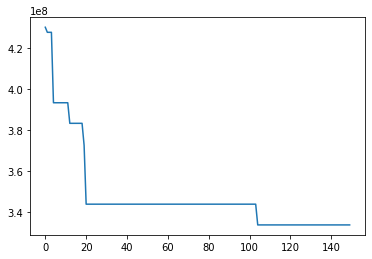

In [ ]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice
from math import sqrt
import matplotlib.pyplot as plt
import json


class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        """
        Args:
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
        Example:
            ant_colony = AntColony(distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        distance_logs=[]
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            distance_logs.append(all_time_shortest_path[1])                      
        return all_time_shortest_path,distance_logs

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started    
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = (pheromone ** self.alpha) * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move


#Static TSP Instance
# distances = np.array([[np.inf, 2, 2, 5, 7],
#                       [2, np.inf, 4, 8, 2],
#                       [2, 4, np.inf, 1, 3],
#                       [5, 8, 1, np.inf, 2],
#                       [7, 2, 3, 2, np.inf]])


#Dinamic TSP Instance, changing the value of n_nodes will change the
#Instance size
# n_nodes=100
# dist=lambda x,y: sqrt(((x[0]-y[0])**2)+((x[1]-y[1])**2))
# l=[(rn.random()*1000,rn.random()*1000) for i in range(n_nodes)]
# distances=np.array([[np.inf if i==j else dist(l[i],l[j]) for i in range(len(l))] for j in range(len(l))])


#Presolved TSP Instance
with open("TSP_Data/gr120.json", "r") as tsp_data:
    tsp = json.load(tsp_data)

distances = np.array(distanceMatrixCostoCero)
tour_size=tsp["TourSize"]
for i in range(len(distanceMatrixCostoCero)):
  distances[i][i]=np.inf
distances=np.array(distances)




ant_colony = AntColony(distances, 50, 50, 150, 0.7, alpha=1, beta=1)
shortest_path,log = ant_colony.run()
print ("shortest_path: {}".format(shortest_path))
plt.plot(log)
plt.show()

El resultado es similar al algoritmo generado por la APi. El costo total del recorrido es de $333.796.375 

**Conclusiones**



*   El costo total por tierra para visitar las ciudades es muy elevado frente a otras alternativas de viaje, como por ejemplo el avión o transporte público. 
*   Para disminuir el costo de combustible se propone utilizar un vehículo con menor consumo de combustible como el chevrolet spark
*   El mejor algoritmo entre los evaluados fue el algoritmo genético, ya que su costo computacional es el menor.
* Las API de google maps ahorran mucho trabajo para hacer las tablas de distancia, en temas geoespaciales.
* El modelo TSP funcionó adecuadamente para calcular las distancias, pero al incluir las variavles del costo de gasolina y pejaes, el modelo no converge






**Referencias**



*   https://developers.google.com/optimization/routing/tsp
*   https://developers.google.com/optimization/routing/vrp#distance_matrix_api
*   https://en.wikipedia.org/wiki/Travelling_salesman_problem



